In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


eda

<Axes: >

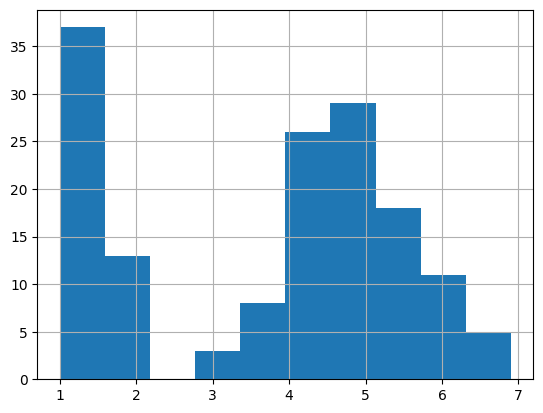

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

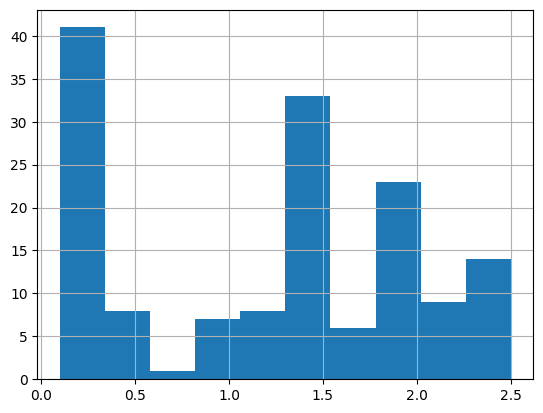

In [ ]:
df['PetalWidthCm'].hist()

<Axes: >

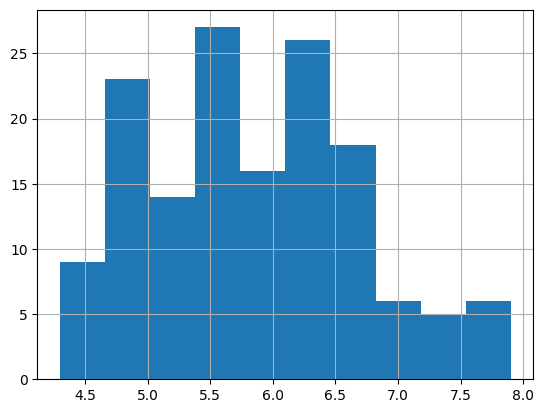

In [ ]:
df['SepalLengthCm'].hist()

<Axes: >

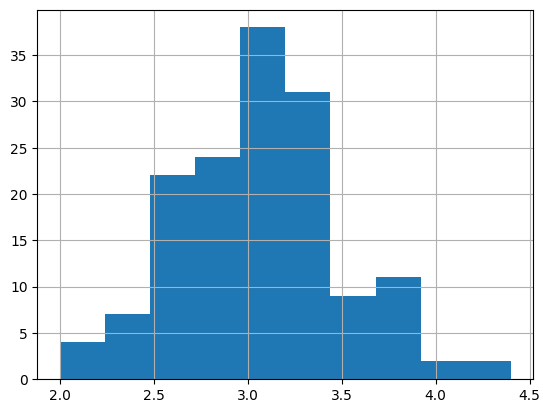

In [ ]:
df['SepalWidthCm'].hist()

In [ ]:
colors = [ 'red', 'green', 'blue']
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'	]


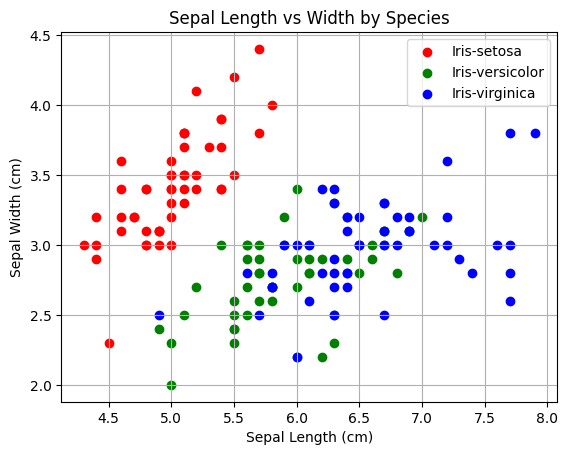

In [ ]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=Species[i])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Width by Species")
plt.legend()
plt.grid(True)
plt.show()



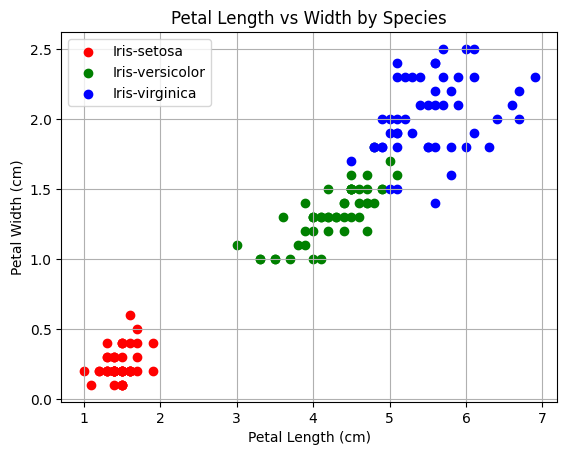

In [ ]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Width by Species")
plt.legend()
plt.grid(True)
plt.show()


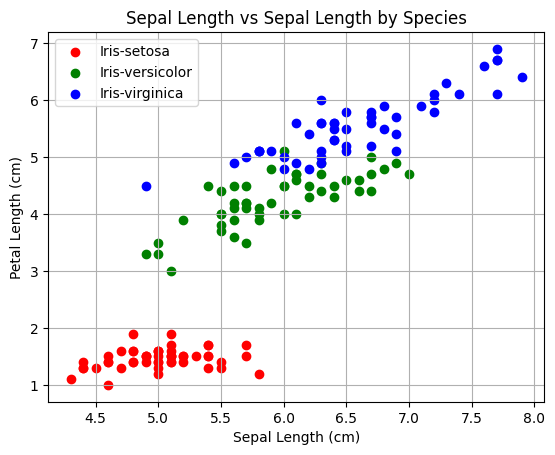

In [ ]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=Species[i])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs Sepal Length by Species")
plt.legend()
plt.grid(True)
plt.show()

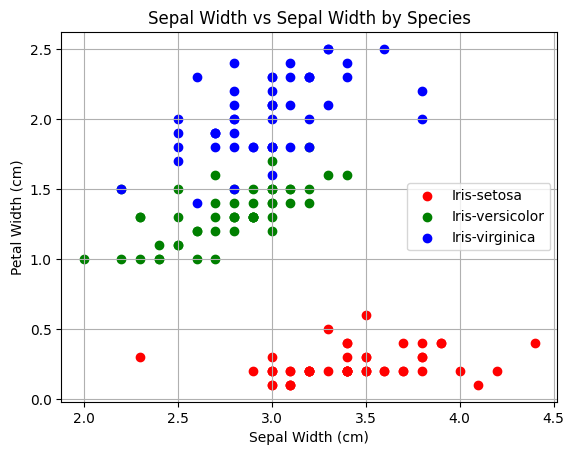

In [ ]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])

plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Sepal Width vs Sepal Width by Species")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.drop('Species', axis=1).corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

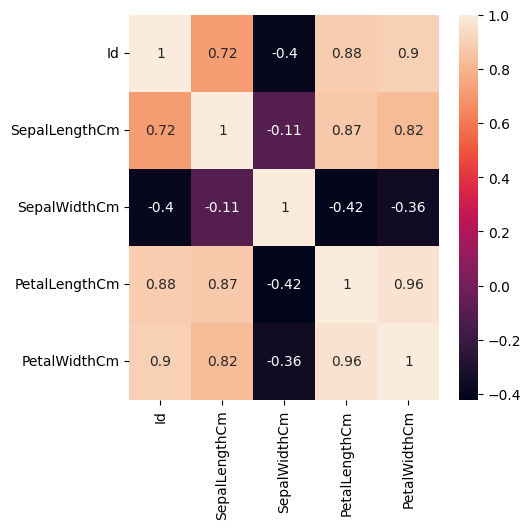

In [ ]:
corr = df.drop('Species', axis=1).corr()
fig, ax= plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True ,ax=ax)

label encoding -> string to numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["Species"]= le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


model training

In [ ]:
X = df.drop(columns = ['Species'])
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 49 )

In [ ]:
model = RandomForestClassifier()

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=49)
model.fit(X_train, Y_train)


RandomForestClassifier(random_state=49)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, Y_test)

1.0

In [ ]:
confusion_matrix(Y_test, Y_pred)
classification_report(Y_test, Y_pred)


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n           1       1.00      1.00      1.00        10\n           2       1.00      1.00      1.00        12\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'